In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11493376/11490434 [==============================] - 0s 0us/step


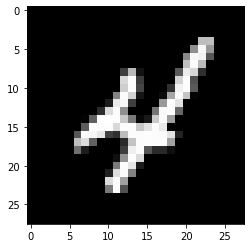

In [10]:
plt.imshow(training_images[9],cmap='gray')

Normalizing

In [12]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

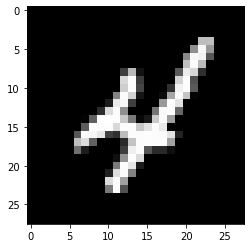

In [13]:
plt.imshow(training_images[9],cmap='gray')

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
from keras.layers import Flatten
from keras.layers import Dropout

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
# model.add(Dropout(0.2))
model.add(Dense(1200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1200,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='sigmoid'))
# model.add(Dropout(0.2))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1200)              942000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1200)              1441200   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                12010     
Total params: 2,395,210
Trainable params: 2,395,210
Non-trainable params: 0
____________________________________________

In [34]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4084 - accuracy: 0.8723
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1683 - accuracy: 0.9507
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9578
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1234 - accuracy: 0.9636
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1134 - accuracy: 0.9667


In [36]:
print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9788
[0.07710634917020798, 0.9787999987602234]


In [37]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
# model.add(Dropout(0.2))
model2.add(Dense(800,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(800,activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='sigmoid'))
# model.add(Dropout(0.2))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
____________________________________________

In [39]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model2.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4404 - accuracy: 0.8590
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1684 - accuracy: 0.9492
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1379 - accuracy: 0.9603
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1245 - accuracy: 0.9636
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1151 - accuracy: 0.9668


In [41]:
print(model2.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 1ms/step - loss: 0.0787 - accuracy: 0.9772
[0.0787496492266655, 0.9771999716758728]


In [42]:
#Student 
student = Sequential()
student.add(Flatten(input_shape=(28,28)))
student.add(Dense(300,activation='relu'))
student.add(Dense(300,activation = 'relu'))
student.add(Dense(10,activation='sigmoid'))
student.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [45]:
student_scratch = keras.models.clone_model(student)

In [47]:
student_scratch.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
student_scratch.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8964
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0565 - accuracy: 0.9817
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0382 - accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9913


In [49]:
print(student_scratch.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9782
[0.07961179316043854, 0.9782000184059143]


In [50]:
data = training_images,training_labels

In [52]:
#KD 
class Distiller(keras.Model):
    
    def __init__(self,teacher,student):
       
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student
    
    def compile(self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,):
        
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature
        
    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
      # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [55]:
# Initialize and compile distiller
distiller = Distiller(student=student, teacher=model)
distiller.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
distiller.fit(training_images, training_labels, epochs=5)

# Evaluate student on test dataset
distiller.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - sparse_categorical_accuracy: 0.9858 - student_loss: 0.0460 - distillation_loss: 1.2017e-04
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - sparse_categorical_accuracy: 0.9909 - student_loss: 0.0323 - distillation_loss: 1.2037e-04
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - sparse_categorical_accuracy: 0.9914 - student_loss: 0.0289 - distillation_loss: 1.1701e-04
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - sparse_categorical_accuracy: 0.9931 - student_loss: 0.0238 - distillation_loss: 1.1804e-04
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - sparse_categorical_accuracy: 0.9794 - student_loss: 0.0939


[0.9793999791145325, 2.287308689119527e-06]